# 연차별 음반 앨범 판매량 데이터를 통해 판매량이 어떻게 변화하는지 시각화 해보자

In [76]:
# 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns

In [64]:
# read csv
df = pd.read_csv("dataset/album_data.csv")
df.head()

,Year,Ranking,Artist,Album,Worldwide Sales (Est.),CDs,Tracks,Album Length,Genre
0,2014,4,Hozier,Hozier,"4,413,503",1,13,0:53:26,Blues
1,1990,10,The Three Tenors,Carreras Domingo Pavarotti In Concert 1990,"8,533,000",1,17,1:07:55,Classical
2,1997,3,Movie Soundtrack,Titanic,"30,000,000",1,15,1:12:31,Classical
3,1997,4,Andrea Bocelli,Romanza,"20,000,000",1,15,1:10:13,Classical
4,2009,9,Andrea Bocelli,My Christmas,"4,060,000",1,15,0:59:17,Classical


In [65]:
# thousand=',' : Woldwide sales 자릿수 구분자 없애기 위함
df = pd.read_csv("dataset/album_data.csv", thousands=',')
df.head()

,Year,Ranking,Artist,Album,Worldwide Sales (Est.),CDs,Tracks,Album Length,Genre
0,2014,4,Hozier,Hozier,4413503,1,13,0:53:26,Blues
1,1990,10,The Three Tenors,Carreras Domingo Pavarotti In Concert 1990,8533000,1,17,1:07:55,Classical
2,1997,3,Movie Soundtrack,Titanic,30000000,1,15,1:12:31,Classical
3,1997,4,Andrea Bocelli,Romanza,20000000,1,15,1:10:13,Classical
4,2009,9,Andrea Bocelli,My Christmas,4060000,1,15,0:59:17,Classical


In [66]:
# 컬럼 이름 변경
df = df.rename(columns={"Worldwide Sales (Est.)" : "World Sales"})
df.head()

,Year,Ranking,Artist,Album,World Sales,CDs,Tracks,Album Length,Genre
0,2014,4,Hozier,Hozier,4413503,1,13,0:53:26,Blues
1,1990,10,The Three Tenors,Carreras Domingo Pavarotti In Concert 1990,8533000,1,17,1:07:55,Classical
2,1997,3,Movie Soundtrack,Titanic,30000000,1,15,1:12:31,Classical
3,1997,4,Andrea Bocelli,Romanza,20000000,1,15,1:10:13,Classical
4,2009,9,Andrea Bocelli,My Christmas,4060000,1,15,0:59:17,Classical


In [67]:
# 판매량 합계를 구하기 위해 data type 변경
df.astype({"World Sales" : 'int'})

,Year,Ranking,Artist,Album,World Sales,CDs,Tracks,Album Length,Genre
0,2014,4,Hozier,Hozier,4413503,1,13,0:53:26,Blues
1,1990,10,The Three Tenors,Carreras Domingo Pavarotti In Concert 1990,8533000,1,17,1:07:55,Classical
2,1997,3,Movie Soundtrack,Titanic,30000000,1,15,1:12:31,Classical
3,1997,4,Andrea Bocelli,Romanza,20000000,1,15,1:10:13,Classical
4,2009,9,Andrea Bocelli,My Christmas,4060000,1,15,0:59:17,Classical
...,...,...,...,...,...,...,...,...,...
315,1994,5,Movie Soundtrack,The Lion King,14522893,1,12,0:46:40,World
316,1996,7,Movie Soundtrack,Raja Hindustani,11000000,1,8,0:51:22,World
317,1997,8,Movie Soundtrack,Dil To Pagal Hai,12500000,1,11,0:54:34,World
318,1997,9,Buena Vista Social Club,Buena Vista Social Club,12000000,1,14,1:00:00,World


In [68]:
# 정보 조회, 결측값이 없는 것을 알 수 있음
# World Sales의 type이 잘 바뀌었다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          320 non-null    int64 
 1   Ranking       320 non-null    int64 
 2   Artist        320 non-null    object
 3   Album         320 non-null    object
 4   World Sales   320 non-null    int64 
 5   CDs           320 non-null    int64 
 6   Tracks        320 non-null    int64 
 7   Album Length  320 non-null    object
 8   Genre         320 non-null    object
dtypes: int64(5), object(4)
memory usage: 22.6+ KB


In [69]:
# 수치형 데이터 기술통계
df.describe()

,Year,Ranking,World Sales,CDs,Tracks
count,320.000000,320.00000,3.200000e+02,320.000000,320.000000
mean,2005.500000,5.50000,1.070507e+07,1.043750,14.306250
std,9.247553,2.87678,7.555652e+06,0.246528,5.868995
min,1990.000000,1.00000,1.909009e+06,1.000000,6.000000
25%,1997.750000,3.00000,5.000000e+06,1.000000,12.000000
50%,2005.500000,5.50000,8.276933e+06,1.000000,13.000000
75%,2013.250000,8.00000,1.400000e+07,1.000000,15.000000
max,2021.000000,10.00000,4.500000e+07,4.000000,67.000000


In [70]:
# 범주형 데이터 기술통계
df.describe(include="object")

,Artist,Album,Album Length,Genre
count,320,320,320,320
unique,177,316,302,10
top,Movie Soundtrack,Greatest Hits,0:50:30,Pop
freq,14,4,2,136


In [71]:
# 연도별 그룹화
df_year = df.groupby("Year")
df_year.sum()

,Ranking,World Sales,CDs,Tracks
Year,,,,
1990,55,154097520,10,125
1991,55,202280000,10,131
1992,55,176854134,10,128
1993,55,166495828,10,145
1994,55,157362203,10,128
1995,55,189668328,11,154
1996,55,146073500,10,119
1997,55,197500000,10,131
1998,55,139258567,11,149


<AxesSubplot:xlabel='Year', ylabel='World Sales'>

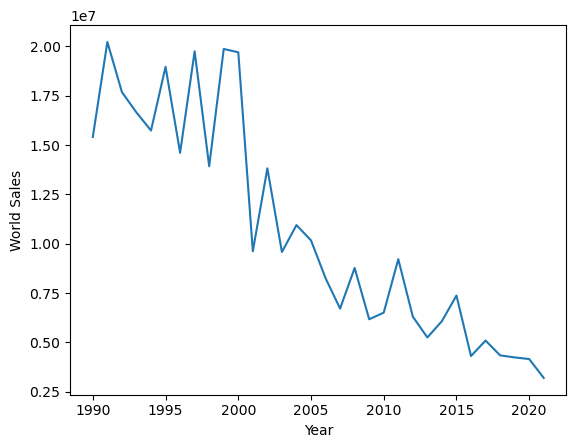

In [72]:
# 30년간 판매량이 계속 줄고 있음을 알 수 있음
sns.lineplot(data=df, x="Year", y="World Sales", errorbar=None)

# 연도별 album 길이가 어떻게 변하는지 시각화 해보자

In [73]:
df.head()

,Year,Ranking,Artist,Album,World Sales,CDs,Tracks,Album Length,Genre
0,2014,4,Hozier,Hozier,4413503,1,13,0:53:26,Blues
1,1990,10,The Three Tenors,Carreras Domingo Pavarotti In Concert 1990,8533000,1,17,1:07:55,Classical
2,1997,3,Movie Soundtrack,Titanic,30000000,1,15,1:12:31,Classical
3,1997,4,Andrea Bocelli,Romanza,20000000,1,15,1:10:13,Classical
4,2009,9,Andrea Bocelli,My Christmas,4060000,1,15,0:59:17,Classical


In [95]:
# 앨범 길이를 초단위로 통일
# 문자열로 표현된 시간을 ':' 기준으로 분리
splited_time = list(df["Album Length"].str.split(':'))

# 분리된 것을 numpy array로 만들고, type도 int로 바꾸기
time_array = np.array(splited_time).astype('int')


# row 개수만큼 [시, 분, 초]를 다 초로 만들어줄 수 있는 matrix 생성
time = [[3600, 60, 1] for _ in range(len(splited_time))]

# 위 두 matrix를 요소별 곱하기
time_to_second = time * time_array

second_list = []
for i in time_to_second:
    second = sum(i)
    second_list.append(second)
    
second_list

[3206,
 4075,
 4351,
 4213,
 3557,
 2074,
 2197,
 2219,
 2142,
 2248,
 2888,
 3606,
 2619,
 6011,
 4375,
 3244,
 2428,
 7385,
 3221,
 4049,
 2650,
 3404,
 2672,
 3784,
 2579,
 3582,
 5453,
 2815,
 3544,
 3652,
 4324,
 3995,
 4639,
 4780,
 3224,
 3570,
 8079,
 4613,
 4675,
 4642,
 3963,
 3480,
 3083,
 4040,
 4616,
 4116,
 4818,
 2772,
 3625,
 4708,
 3562,
 3879,
 3143,
 8533,
 4874,
 3040,
 3294,
 3866,
 5384,
 3513,
 2247,
 2413,
 2893,
 3056,
 3401,
 3654,
 3530,
 2129,
 1456,
 5162,
 4197,
 4412,
 2864,
 2806,
 3225,
 2416,
 4623,
 3464,
 4630,
 1725,
 2521,
 2961,
 3939,
 2371,
 2802,
 8931,
 3511,
 4020,
 2396,
 3268,
 3536,
 4468,
 2444,
 2317,
 2778,
 2640,
 4002,
 4393,
 2891,
 2540,
 4318,
 3556,
 2787,
 3111,
 2873,
 2677,
 2835,
 2954,
 3009,
 2387,
 2703,
 3795,
 4654,
 4732,
 3117,
 3652,
 2368,
 2786,
 3388,
 3000,
 3182,
 3260,
 3972,
 5905,
 2762,
 3361,
 3219,
 2776,
 3027,
 3020,
 4197,
 2616,
 2620,
 2496,
 2580,
 2049,
 2854,
 2749,
 1558,
 2804,
 2127,
 2799,
 2257,

In [102]:
# 파생변수로 추가
df["Second of Album"] = pd.DataFrame(second_list)
df.head(5)

,Year,Ranking,Artist,Album,World Sales,CDs,Tracks,Album Length,Genre,Second of Album
0,2014,4,Hozier,Hozier,4413503,1,13,0:53:26,Blues,3206
1,1990,10,The Three Tenors,Carreras Domingo Pavarotti In Concert 1990,8533000,1,17,1:07:55,Classical,4075
2,1997,3,Movie Soundtrack,Titanic,30000000,1,15,1:12:31,Classical,4351
3,1997,4,Andrea Bocelli,Romanza,20000000,1,15,1:10:13,Classical,4213
4,2009,9,Andrea Bocelli,My Christmas,4060000,1,15,0:59:17,Classical,3557


In [103]:
df.groupby(by="Year")

<AxesSubplot:xlabel='Year', ylabel='Second of Album'>

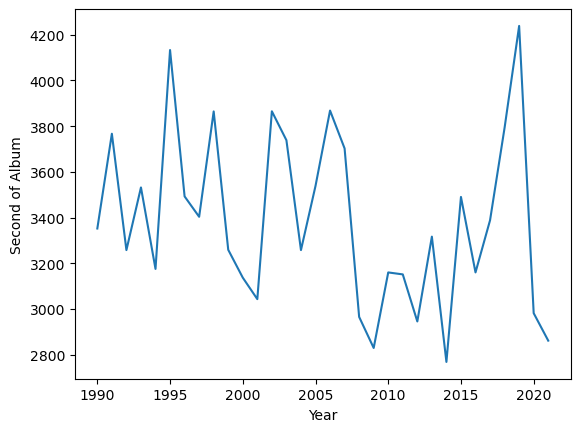

In [104]:
# 앨범 길이 역시 감소세를 보이지 않을까 생각했다
# 앨범 길이는 변화가 없다
sns.lineplot(data=df, x="Year", y="Second of Album", errorbar=None)

# 어떤 장르가 가장 많이 발매 되었을까

<AxesSubplot:xlabel='Genre', ylabel='count'>

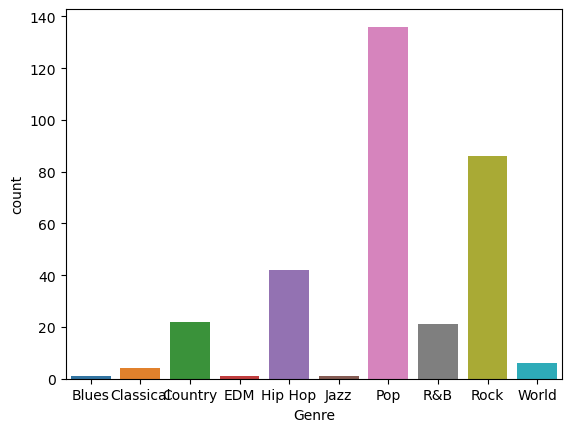

In [106]:
sns.countplot(data=df, x="Genre")